<a href="https://colab.research.google.com/github/jacobpad/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132A_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# A bunch of imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
week_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sum = 0
count = 0

for i in week_sales:
  sum += i

for i in week_sales:
  if i > 1:
    count += 1

mean = sum/7

# Find varaince
top = 0
for i in week_sales:
  top += (i-mean)**2



varaince = top / (count-1)
std = varaince**(1/2)

print('Hard code Sum: ',sum)
print('Hard code Mean: ',mean)
print('Hard code Varaince: ',varaince)
print('Hard code Standard Deviation: ',std)

print('\nThe real way Sum', np.sum(week_sales))
print('The real way Mean: ',np.mean(week_sales))
print('The real way Varaince: ',np.var(week_sales))
print('The real way Standard Deviation: ',np.std(week_sales))

Hard code Sum:  21369
Hard code Mean:  3052.714285714286
Hard code Varaince:  214387.90476190473
Hard code Standard Deviation:  463.0204150595357

The real way Sum 21369
The real way Mean:  3052.714285714286
The real way Varaince:  183761.06122448976
The real way Standard Deviation:  428.67360686714756


In [3]:
# The Function Way
def calculations(data):
  # Set variables
  sum = 0
  count = 0
  top = 0

  # Get the sum
  for i in data:
    sum += i

  # Count the length
  for i in data:
    if i > 1:
      count += 1

  mean = sum/7

  # Find varaince
  for i in data:
    top += (i-mean)**2

  # Do math
  varaince = top / (count-1)
  std = varaince**(1/2)

  return ('Sum:', sum, 'Mean:',mean, 'Varaince:', varaince, 'Standard Deviation:', std)

# Call function
calculations(week_sales)

('Sum:',
 21369,
 'Mean:',
 3052.714285714286,
 'Varaince:',
 214387.90476190473,
 'Standard Deviation:',
 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
# Last week's sales
print('Last week\'s sales:')
print(week_sales)

# Number of customers that entered the store last week
num_of_cust = [127, 80, 105, 92, 120, 115, 93]
print('\nNumber of customers that entered the store last week:')
print(num_of_cust)

last_week = {"week_sales":week_sales, "num_of_cust":num_of_cust}

df = pd.DataFrame(last_week)

print('')

df_cov = df.cov()
df_cov

Last week's sales:
[3505, 2400, 3027, 2798, 3700, 3250, 2689]

Number of customers that entered the store last week:
[127, 80, 105, 92, 120, 115, 93]



,week_sales,num_of_cust
week_sales,214387.904762,7604.357143
num_of_cust,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
# Find the standard deviation of customers who entered the store last week.
std_num_of_cust = np.std(num_of_cust)
print('Standard Deviation of customers:',std_num_of_cust)

# Standardize the covariance to find the correlation coefficient
# cov/2std's
sales_cust_std = std*std_num_of_cust
cov_stds = df_cov/(sales_cust_std)

print(cov_stds)
# print(sales_var.var(ddof=1))
# print(sales_var.std(ddof=1))
# print(cust_var.std(ddof=1))
# print(cust_var(std(ssof=1)))

Standard Deviation of customers: 15.792015549069118
             week_sales  num_of_cust
week_sales    29.319906     1.039980
num_of_cust    1.039980     0.039791


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [7]:
df1.head(1)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1


In [0]:
df1 = df1.drop(columns=['Unnamed: 0', 'name', 'sex', 'cabin', 'embarked', 'home.dest'])

In [9]:
df1.head(1)

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1.0,1.0,29.0,0.0,0.0,24160,211.3375,2,NaN,1


In [10]:
print(df1.cov())
print(df.corr())

                     pclass  survived  ...         body  has_cabin_number
pclass             0.701969 -0.127248  ...    -2.876653         -0.249992
survived          -0.127248  0.236250  ...     0.000000          0.061406
age               -3.954605 -0.314343  ...    81.622922          1.463138
sibsp              0.053090 -0.014088  ...    -8.708471         -0.003946
parch              0.013287  0.034776  ...     4.237190          0.013316
fare             -24.227788  6.146023  ...  -179.164684         10.976961
body              -2.876653  0.000000  ...  9544.688567          3.625689
has_cabin_number  -0.249992  0.061406  ...     3.625689          0.174613

[8 rows x 8 columns]
             week_sales  num_of_cust
week_sales     1.000000     0.962834
num_of_cust    0.962834     1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

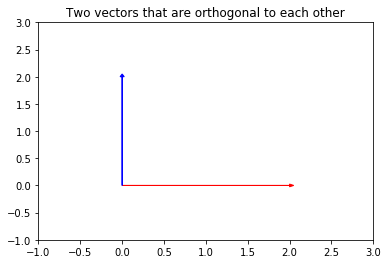

In [11]:
v1 = [2,0]
v2 = [0,2]

plt.arrow(0,0,v1[0],v1[1],head_width=.05, head_length=.05, color='red')
plt.arrow(0,0,v2[0],v2[1],head_width=.05, head_length=.05, color='blue')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title('Two vectors that are orthogonal to each other');
# They are perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [12]:
a = ([-5,3,7])
b = ([6,-8,2])
# a dot b
print(np.dot(a,b))
print('They are not orthogonal because -40 doesn\'t equal 0')

-40
They are not orthogonal because -40 doesn't equal 0


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
c = ([2,-15,6,20])
c=np.array(c)
# Norm
print('Norm')
print(np.linalg.norm(c))

# Dot
print('\nDot')
print(np.dot(c,c))

# Transposed
print('\nTransposed')
print(np.transpose(c))
c_transposed = c.T 
print(c_transposed)

Norm
25.787593916455254

Dot
665

Transposed
[  2 -15   6  20]
[  2 -15   6  20]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}d = 7\hat{i} + 12 \hat{j}\end{align}

\begin{align}e = 2\hat{i} + 11 \hat{j} + -8\hat{k}\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

First calulate the norm
 \begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2 + 9^2 + 2^2} 
\end{align}
\begin{align}
 ||f|| = \sqrt{366}
\end{align}
\begin{align}
 ||f|| = 19.1311
\end{align}

Now we can multiply our vector f by 1 over it's norm to get the unit vector
\begin{align}
 \hat{f} = \frac{1}{19.13}\begin{bmatrix} 4 \\ 12 \\  11 \\ 9 \\ 2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19.13} \\ \frac{12}{19.13} \\  \frac{11}{19.13} \\ \frac{9}{19.13} \\ \frac{2}{19.13} \end{bmatrix}
\end{align}

In [14]:
# Make array
f = np.array([4,12,11,9,2])
f_list = []
total = 0

# Find the norm and...
# Append the norm (unit vector) of f to the list
for i in f:
  total = i / np.linalg.norm(f)
  f_list.append(total)

# Print the appended list
f_list

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-0.5, 10)

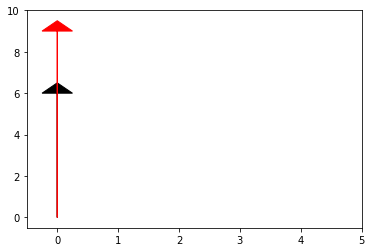

In [15]:
# Plot vectors that are linearly dependent

# Set vectors
v1 = [0,6]
v2 = [0,9]

# Make plot
plt.arrow(0,0,v1[0],v1[1],head_width=.5,head_length=.5,color='black')
plt.arrow(0,0,v2[0],v2[1],head_width=.5,head_length=.5,color='red')
plt.xlim(-.5,5)
plt.ylim(-.5,10)

(-0.5, 10)

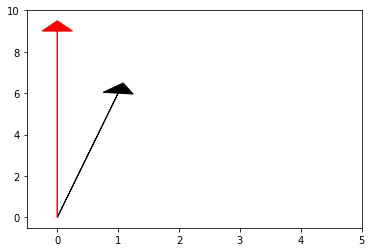

In [16]:
# Plot two vectors that are linearly independent
# Set vectors
v1 = [1,6]
v2 = [0,9]

# Make plot
plt.arrow(0,0,v1[0],v1[1],head_width=.5,head_length=.5,color='black')
plt.arrow(0,0,v2[0],v2[1],head_width=.5,head_length=.5,color='red')
plt.xlim(-.5,5)
plt.ylim(-.5,10)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [17]:
# Span is the area of space that can be spanned by scaling the vectors (dimensionality)
# To check the span of these two vectors, we have to check to see if they are linearly dependent (redundancy)
g_and_h = np.asarray([[1,2], [4,8]])
g_and_h

# Dependant means redundant - linear independence means not redundent.
# if 5 vectors exist, and 3 are dependant, the 5 vectors span 2 dimensional space because 
# 3 are redundant

# Using Gaussian elimination (row reduction)
# Multiply the first vector by -4 and add it to the second vector to 0 out the first column
# result is [0,0]
# Because only the first row has a leading 1 and the second row came out to all 
# 0's, it shows these 2 vectors were linearly dependent
# as a result, the span of the following vectors is 1 (rank of the matrix was 1)

array([[1, 2],
       [4, 8]])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

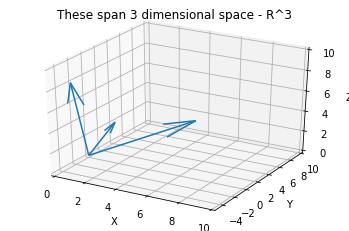

In [22]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# Three coordinants of a 3-d vector
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

# Array 'em
vectors = np.array([[0,0,0,1,2,3],
                    [0,0,0,-1,0,7],
                    [0,0,0,4,8,2]])

# Vector zip...???
X,Y,Z,U,V,W = zip(*vectors)

# Graph stuff
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W, length=1)
ax.set_xlim([0,10])
ax.set_ylim([-5,10])
ax.set_zlim([0,10])

# Label the graph
ax.set_title('These span 3 dimensional space - R^3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



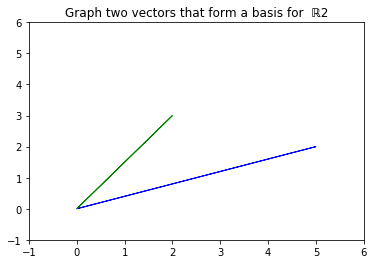

In [25]:
# vectors
v1 = [5,2]
v2 = [2,3]

# plot the vectors
plt.arrow(0,0,v1[0],v1[1],head_width=.0,head_length=.0,color='blue')
plt.arrow(0,0,v2[0],v2[1],head_width=.0,head_length=.0,color='green')

plt.xlim(-1,6)
plt.ylim(-1,6)
plt.title('Graph two vectors that form a basis for  ℝ2');

## 6.2 What does it mean to form a basis?

In [0]:
# Vectors that form a basis are linearly independent of eachother

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# The span/rank is ℝ3, P can cover all areas of 3 dimensional space

## 7.2 What does the rank of a matrix tell us?

In [0]:
# The rank lets us know which dimensions the vectors can exist in.
# And we can tell that by the number of independence of the vectors
# within a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

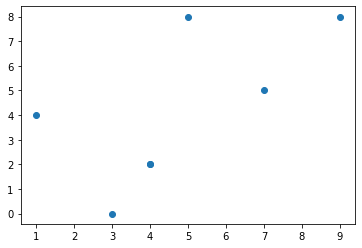

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()